# Analise de Acidentes

    Copyright (C) 2019 - Luis Vitório
    Analise de Acidentes de Trânsito

    Este programa é um software livre: você pode redistribuí-lo e/ou
    modificá-lo sob os termos da Licença Pública Geral Affero GNU,
    conforme publicado pela Free Software Foundation, seja a versão 3
    da Licença ou (a seu critério) qualquer versão posterior.

    Este programa é distribuído na esperança de que seja útil,
    mas SEM QUALQUER GARANTIA; sem a garantia implícita de
    COMERCIALIZAÇÃO OU ADEQUAÇÃO A UM DETERMINADO PROPÓSITO. Veja a
    Licença Pública Geral Affero GNU para obter mais detalhes.

    Você deve ter recebido uma cópia da Licença Pública Geral Affero GNU
    junto com este programa. Se não, veja <https://www.gnu.org/licenses/>.

    linkedin: https://www.linkedin.com/in/vitorioluis/
    email: vitorioluis@gmail.com

#### Dados obtidos de 

#### Ferramentas utilizadas para realizar o Data Analytics
<img src="./img/1.png" >

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## Fase 1
#### Importar e tratar os dados

In [2]:
# arquivo por formato
def filtrar_arquivo(tipo):
    path = './'
    lst_arq = os.listdir(path) # listando novamente o diretório para verificar arquivos csv
    return [arq for arq in lst_arq if arq[-3:] == tipo]

# Separa arquivo zip caso haja outros tipos de arquivo na pasta
lst_zip = filtrar_arquivo('zip')

# extrair arquivos do zip para trabalhar
for zp in lst_zip:
    fzp = zipfile.ZipFile(zp)
    fzp.extractall('./') 
    fzp.close()

# Separa arquivo csv caso haja outros tipos de arquivo na pasta
lst_csv = filtrar_arquivo('csv')

# criar dataframe vazio para unir as bases
df_acidentes = pd.DataFrame()

# aqui vamos ler cada arquivos csv e juntar no mesmo dataframe
for csv in lst_csv:
    df = pd.read_csv(csv, sep=';', encoding='latin1')
    df_acidentes = df.append(df)
    os.remove(csv)

In [16]:
# verificar se está tudo ok
df_acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973.0,216524.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
1,99973.0,216530.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
2,99973.0,216523.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
3,99973.0,216527.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
4,99973.0,216532.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Masculino,1,0,0,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ


In [18]:
# quantidades de linhas e colunas
df_acidentes.shape

(270912, 37)

##### Nosso conjunto de dados contém 270.912 linhas divididas em 37 colunas

In [5]:
# nomes das colunas
df_acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [19]:
# plot para verificar dados faltantes em amarelo
def grafico_dados_faltantes():
    plt.figure(figsize=(15,10))
    return sns.heatmap(df_acidentes.isnull(), yticklabels=False, cbar=False, cmap='viridis');

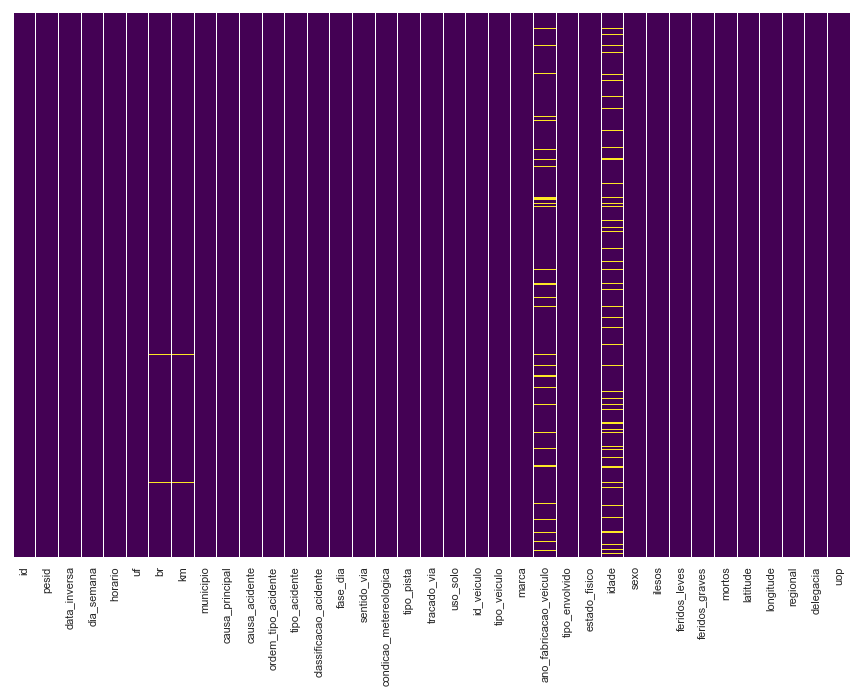

In [7]:
grafico_dados_faltantes();

##### No gráfico acima podemos observar os dados faltantes em amarelo, apenas 4 colunas contém dados faltantes:
#####   * "br" => Nome da rodovia
#####   * "km" => kilômetro onde aconteceu o acident 
#####   * "idade" => idade do contutor do veículo
#####   * "ano_fabricacao_veiculo" => como o próprio nome ja diz ano de fabricação do veículo

In [3]:
# vamos aplicar a média de idade para preencher os dados faltandes da coluna "idade"
df_acidentes['idade'].fillna((df_acidentes['idade'].mean(skipna=True)),inplace=True)

# gerar a média do ano de fabricação
ano_medio_fabricacao = int(df_acidentes['ano_fabricacao_veiculo'].mean())

# tratando o ano médio de fabricação do veículo
df_acidentes['ano_fabricacao_veiculo'].fillna((ano_medio_fabricacao),inplace=True);

# tratando o campo 'br' que não estão preenchidas
# subistitui o Nulo por Zero(0)
df_acidentes['br'] = df_acidentes['br'].fillna(0) 

# converte em inteiro para remover casa decimal
df_acidentes['br'] = df_acidentes['br'].astype(int)

# converte em str
df_acidentes['br'] = df_acidentes['br'].astype(str) 

# preenche os campos de valores Zero(0) 
df_acidentes[df_acidentes['br'] == '0']['br'] = 'Nome da BR não preenchido' 

# normalizando dados
df_acidentes['br'] = df_acidentes['br'].apply(lambda n: '0' * (3 - len(n)) + n if len(n) < 3 else n); 

# substitui ',' por '.' para converter em float
df_acidentes['km']=df_acidentes['km'].apply(lambda x: str(x).replace(".","").replace(",","."))

# converte em float
df_acidentes['km'] = df_acidentes['km'].astype(float)

# aplica a média do km nos campos vazios
df_acidentes['km'].fillna((df_acidentes['km'].mean(skipna=True)),inplace=True)

c:\python36\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


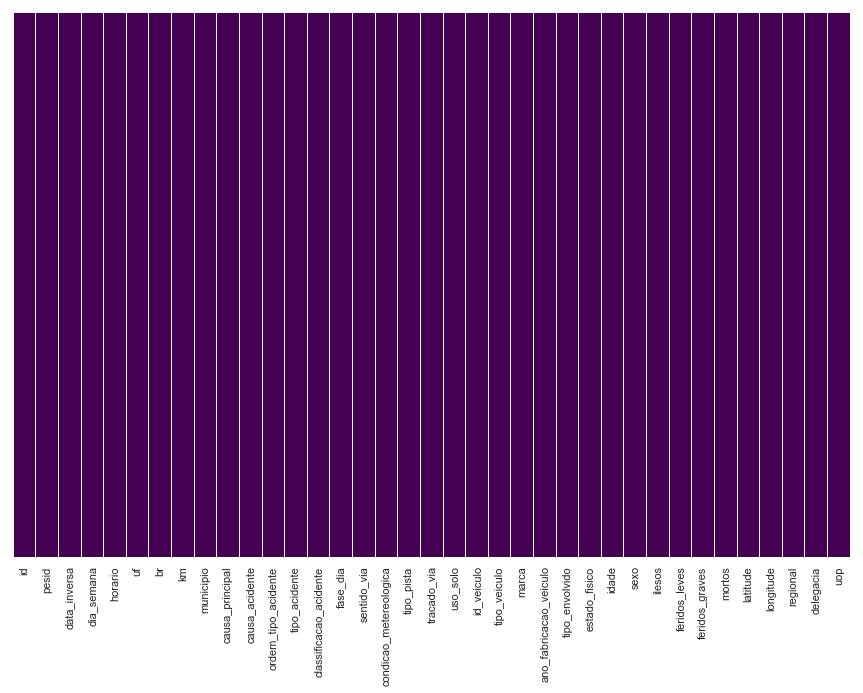

In [37]:
grafico_dados_faltantes();

## Fase 2

#### Agora que normalizamos nossos dados podemos ir para a próxima fase.

### Conhecer/Explorar os dados

##### Para não precisar toda hora ficar digitando a mesma coisa em graficos uma função básica para gerar gráfico 

In [28]:
# total de linha que contém no dataframe
ncount = len(df_acidentes)

# função para gerar gráfico padrão
def gerar_grafico_countplot(campo, largura=10, altura=14, df = df_acidentes,titulo='Acidentes'):
    
    ax = df[campo].value_counts().plot(kind='barh', figsize=(largura, altura), fontsize=13, );
    ax.set_alpha(0.8)
    ax.set_xlabel('Números de Acidentes')
    ax.set_title(titulo)
    ax.set_xticks(np.arange(0, 110, 10)*len(df)/100)
    totals = []

    # encontrar os valores e acrescentar à lista
    for i in ax.patches:
        totals.append(i.get_width())
    
    # definir barras individuais usando a lista acima
    total = sum(totals)

    # definir barras individuais usando a lista acima
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,color='dimgrey')

    # invertido para maior no topo
    ax.invert_yaxis()

    return ax
    

##### Nesta etapa da nossa analise vamos conhecer bem que temos em nossa base de dados, vamos gerar uma série de gráficos buscando por insights.

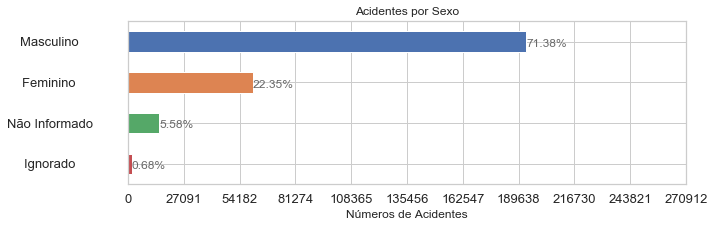

In [29]:
# acidentes por sexo
gerar_grafico_countplot('sexo',altura=3,titulo="Acidentes por Sexo");

##### Tem imagens que 'fala' mais que mil palavras, esse gráfico é um deles. Os acidentes ocorrido com homens ao volante é mais que 3 vezes s

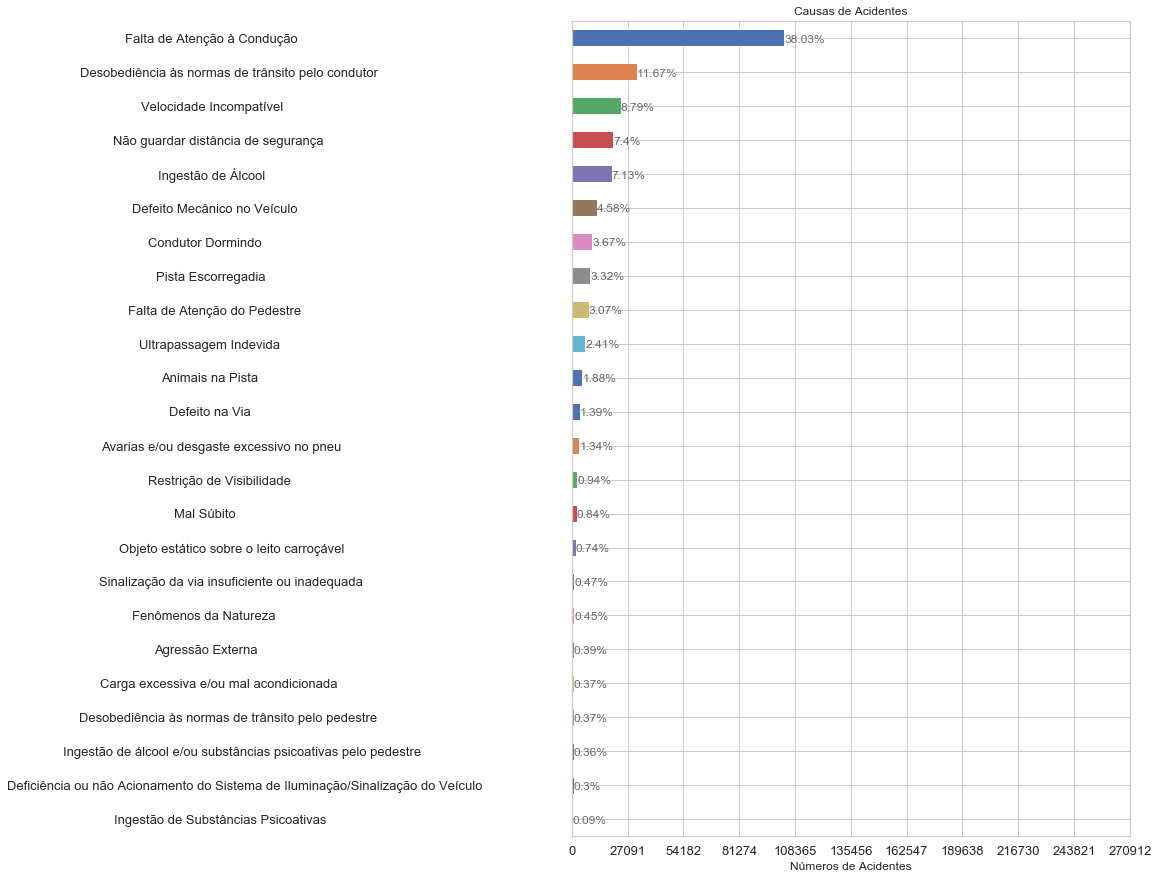

In [30]:
gerar_grafico_countplot('causa_acidente', altura = 15,largura=10,titulo='Causas de Acidentes');

##### Neste gráfico a categoria "Falta de atenção à condução" é esmagadora estou até surpreso com tamanha desproporção.

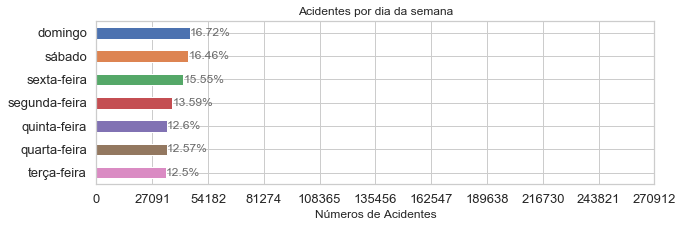

In [31]:
gerar_grafico_countplot('dia_semana', altura=3,largura=10, titulo='Acidentes por dia da semana');

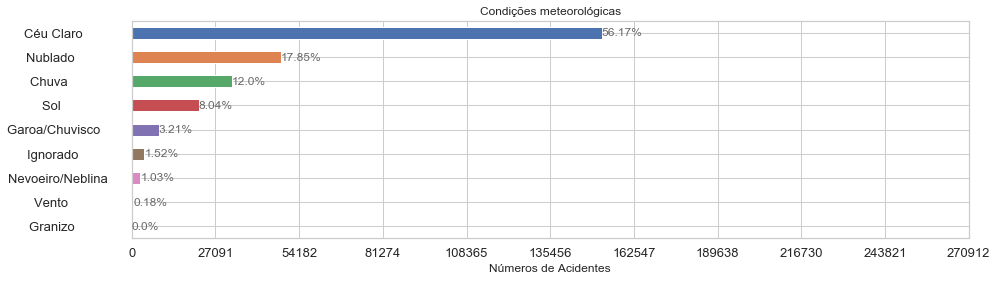

In [32]:
gerar_grafico_countplot('condicao_metereologica', altura=4,largura=15, titulo='Condições meteorológicas');

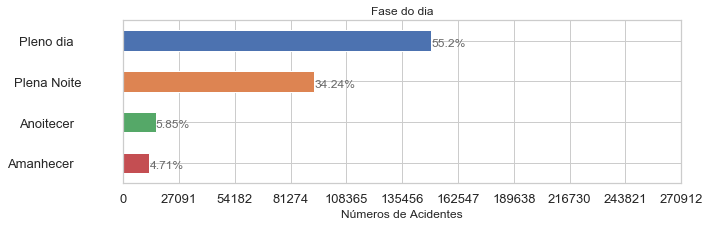

In [33]:
gerar_grafico_countplot('fase_dia', altura = 3,titulo= 'Fase do dia');

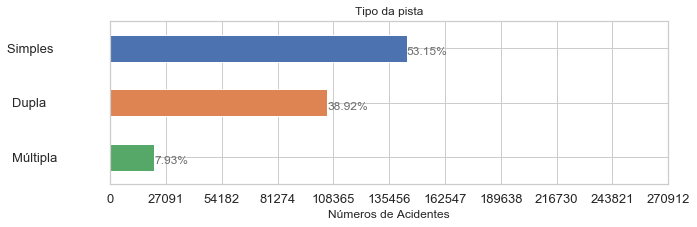

In [34]:
gerar_grafico_countplot('tipo_pista', altura = 3, titulo = 'Tipo da pista');

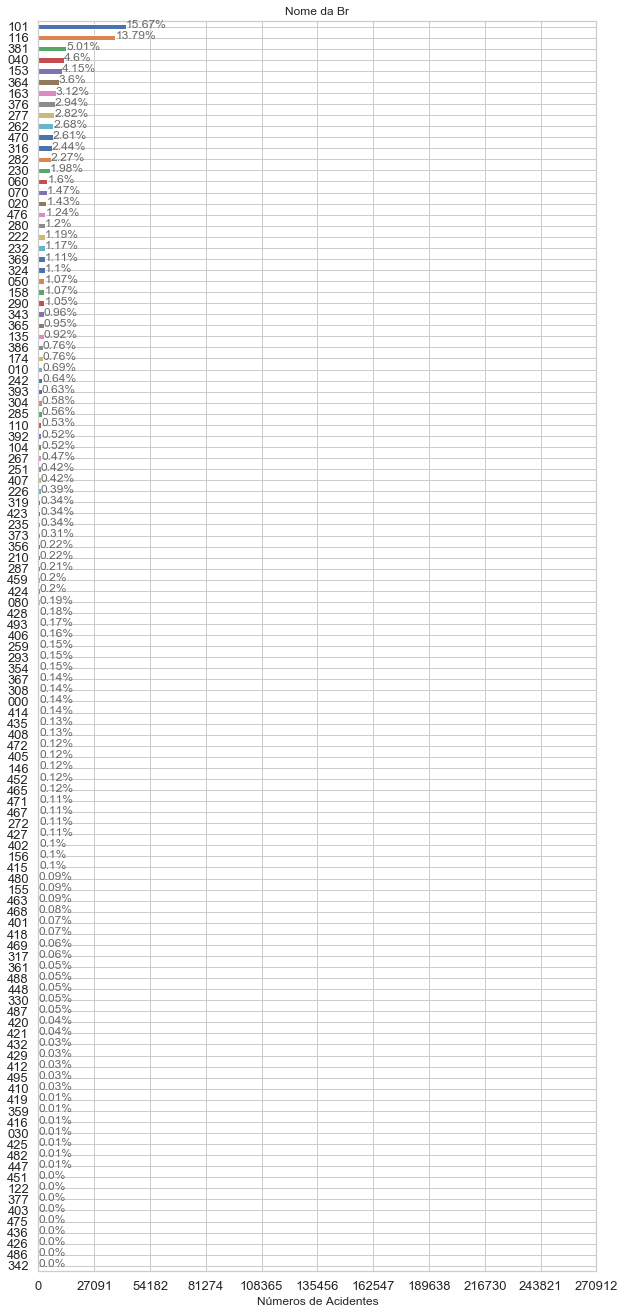

In [35]:
gerar_grafico_countplot('br', largura=10,altura=23, titulo='Nome da Br');

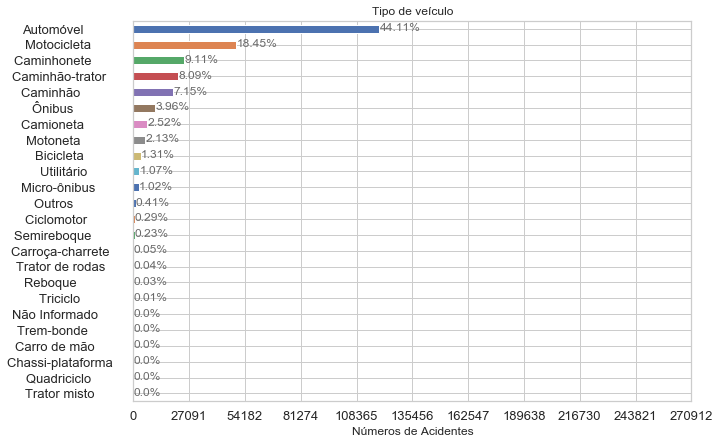

In [36]:
gerar_grafico_countplot('tipo_veiculo', altura=7,titulo='Tipo de veículo');

In [ ]:
# teste de correlação entre tipo_pista x tipo_veiculo
df_acidentes.tipo_pista.corr(df_acidentes.tipo_veiculo);

In [4]:
# correlação entre todas as variáveis do nosso dataframe.
df_acidentes.corr()

,id,pesid,km,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
id,1.000000,0.999228,-0.025235,0.027300,0.999581,0.018403,-0.013998,-0.063156,0.034853,0.028861,0.017016,0.029681,0.003512
pesid,0.999228,1.000000,-0.025856,0.026050,0.999662,0.018180,-0.013436,-0.062113,0.034155,0.028759,0.014705,0.030807,0.005283
km,-0.025235,-0.025856,1.000000,0.035132,-0.025445,-0.013320,-0.000460,0.005345,-0.000969,-0.007121,0.010143,-0.040368,-0.177667
ordem_tipo_acidente,0.027300,0.026050,0.035132,1.000000,0.026230,-0.000841,-0.003910,-0.053232,0.020560,0.023026,0.042506,-0.005711,-0.025384
id_veiculo,0.999581,0.999662,-0.025445,0.026230,1.000000,0.018358,-0.013813,-0.062729,0.034399,0.028601,0.016546,0.029671,0.004213
ano_fabricacao_veiculo,0.018403,0.018180,-0.013320,-0.000841,0.018358,1.000000,0.000228,0.002600,0.025387,-0.010952,-0.012848,0.114578,0.053600
idade,-0.013998,-0.013436,-0.000460,-0.003910,-0.013813,0.000228,1.000000,0.013104,-0.018920,0.005198,0.005274,0.013727,0.020758
ilesos,-0.063156,-0.062113,0.005345,-0.053232,-0.062729,0.002600,0.013104,1.000000,-0.673619,-0.312962,-0.165539,-0.018936,-0.030928
feridos_leves,0.034853,0.034155,-0.000969,0.020560,0.034399,0.025387,-0.018920,-0.673619,1.000000,-0.255677,-0.135239,-0.036964,-0.005896
feridos_graves,0.028861,0.028759,-0.007121,0.023026,0.028601,-0.010952,0.005198,-0.312962,-0.255677,1.000000,-0.062832,0.035313,0.031099
